Homework:

The folder '~//data//homework' contains data of Titanic with various features and survivals.

Try to use what you have learnt today to predict whether the passenger shall survive or not.

Evaluate your model.

In [1]:
# 读取数据
import pandas as pd

data = pd.read_csv('..//data//homework//train.csv')
df = data.copy()
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S


In [2]:
# 去除无用特征
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [3]:
# 替换/删除空值，这里是删除
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))
df.dropna(inplace=True)
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))

Is there any NaN in the dataset: True
Is there any NaN in the dataset: False


In [4]:
# 把categorical数据通过one-hot变成数值型数据
# 很简单，比如sex=[male, female]，变成两个特征,sex_male和sex_female，用0, 1表示
df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0,1,0
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [8]:
# 分离特征与标签
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
# train-test split
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train: {}'.format(np.shape(X_train)))
print('y_train: {}'.format(np.shape(y_train)))
print('X_test: {}'.format(np.shape(X_test)))
print('y_test: {}'.format(np.shape(y_test)))

X_train: (569, 10)
y_train: (569,)
X_test: (143, 10)
y_test: (143,)


In [12]:
# build model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = dict()

models['SVM'] = SVC(kernel='rbf')  # SVM这里我们搞个最常用的
models['KNeighbor'] = KNeighborsClassifier(n_neighbors=5)  # n_neighbors表示neighbor个数
models['RandomForest'] = RandomForestClassifier(n_estimators=1000)  # n_estimators表示树的个数

In [13]:
# predict and evaluate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np


def plot_cm(model, y_true, y_pred, name=None):
    """画混淆矩阵
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def plot_cm_ratio(model, y_true, y_pred, name=None):
    """画混淆矩阵（按占各类型比例）
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    cm_ratio = np.zeros(cm.shape)
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            cm_ratio[i, j] = cm[i, j] / cm[i].sum()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ratio, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def model_perf(model, y_true, y_pred, name=None):
    """返回模型分类准确率，tpr，fpr
    """
    if name is not None:
        print('For model {}: \n'.format(name))
    cm = confusion_matrix(y_true, y_pred)
    for i in range(len(model.classes_)):
        # TODO: Add comments
        tp = cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        tn = cm.sum() - tp - fp - fn
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        acc = (tp + tn) / cm.sum()
        print('For class {}: \n TPR is {}; \n FPR is {}; \n ACC is {}. \n'
        .format(model.classes_[i], tpr, fpr, acc))
    return None


def ovo_eval(model, name=None):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plot_cm(model, y_test, prediction, name)
    plot_cm_ratio(model, y_test, prediction, name)
    model_perf(model, y_test, prediction, name)
    print('Overall Accuracy: {}'.format(model.score(X_test, y_test)))


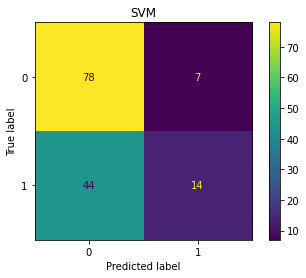

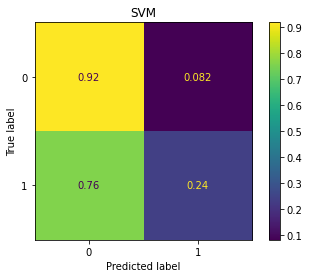

For model SVM: 

For class 0: 
 TPR is 0.9176470588235294; 
 FPR is 0.7586206896551724; 
 ACC is 0.6433566433566433. 

For class 1: 
 TPR is 0.2413793103448276; 
 FPR is 0.08235294117647059; 
 ACC is 0.6433566433566433. 

Overall Accuracy: 0.6433566433566433


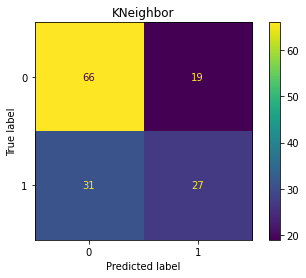

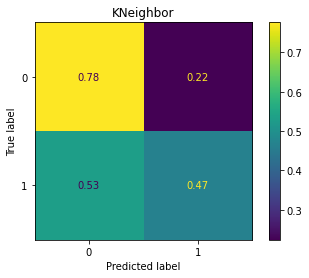

For model KNeighbor: 

For class 0: 
 TPR is 0.7764705882352941; 
 FPR is 0.5344827586206896; 
 ACC is 0.6503496503496503. 

For class 1: 
 TPR is 0.46551724137931033; 
 FPR is 0.2235294117647059; 
 ACC is 0.6503496503496503. 

Overall Accuracy: 0.6503496503496503


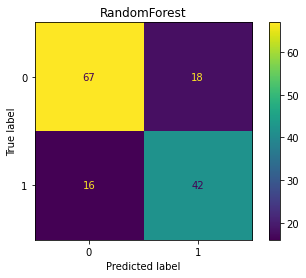

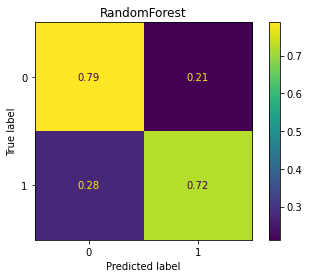

For model RandomForest: 

For class 0: 
 TPR is 0.788235294117647; 
 FPR is 0.27586206896551724; 
 ACC is 0.7622377622377622. 

For class 1: 
 TPR is 0.7241379310344828; 
 FPR is 0.21176470588235294; 
 ACC is 0.7622377622377622. 

Overall Accuracy: 0.7622377622377622


In [14]:
# 评估各模型性能
for name, model in models.items():
    ovo_eval(model, name)